In [ ]:
!pip install pandas
import pandas as pd

In [2]:
df = pd.read_csv("/content/lubaszka - lubaszka.csv")

Część 1.

In [3]:
#1. 
df["created_at"] = [row.replace("Mon", "Poniedziałek").replace("Tue", "Wtorek").replace("Wed","Środa").replace("Thu","Czwartek").replace("Fri","Piątek").replace("Sat","Sobota").replace("Sun","Niedziela") for row in df["created_at"]]

#2
df["user_created_at"] = [row.replace("Jan", "01").replace("Feb", "02").replace("Mar","03").replace("Apr","04").replace("May","05").replace("Jun","06").replace("Jul","07").replace("Aug","08").replace("Sep","09").replace("Oct","10").replace("Nov","11").replace("Dec","12") for row in df["user_created_at"]]


In [4]:
#3
lista1 = []

for row in df["tweet_url"]:
  lista1.append(row)

print(lista1)

['https://twitter.com/NieOddac/status/1411957559712432128', 'https://twitter.com/MeteoprognozaPL/status/1411963424221941763', 'https://twitter.com/jolaiza29/status/1412031023588708352', 'https://twitter.com/PogodaMeteo/status/1411936323779371013', 'https://twitter.com/WESLEYROBERTART/status/1412006678275448834', 'https://twitter.com/SDGsbot/status/1411946061564985349', 'https://twitter.com/iSokolkaeu/status/1411964452921122816', 'https://twitter.com/Squabercom/status/1412024990497656836', 'https://twitter.com/SolskaAda/status/1411970011992891394', 'https://twitter.com/PogodaMeteo/status/1411996139604357122', 'https://twitter.com/TestateTornado/status/1411993985946734595', 'https://twitter.com/PerfectDilemma2/status/1412029598758588419', 'https://twitter.com/tytus_de_zoo_/status/1412035207608348675', 'https://twitter.com/PogodaMeteo/status/1411968124627324930', 'https://twitter.com/TerazSrodowisko/status/1411976056249237505', 'https://twitter.com/RafalDudkiewic1/status/14120316949374648

In [5]:
#4
lista2 = []

for row in df["urls"].dropna(how='all'):
  lista2.append(row)

print(lista2)

['https://blog.squaber.com/2021/07/niewidzialna-reka-hossy-magazyn-bilans-lipiec-2021/', 'https://blog.meteomodel.pl/temperatura-baltyku/', 'https://twitter.com/EURO2024/status/1410938319568084993', 'https://www.teraz-srodowisko.pl/aktualnosci/holandia-elektrownie-weglowe-10552.html', 'http://www.portalmorski.pl/inne/48771-przelewanie-sie-fal-przez-nabrzeza-bedzie-coraz-czestsze-rowniez-w-polsce', 'https://en.wikipedia.org/wiki/Svante_Arrhenius#:~:text=Arrhenius%2C%20in,greenhouse%20effect', 'https://blog.meteomodel.pl/temperatura-baltyku/', 'https://twitter.com/EURO2024/status/1410938319568084993', 'https://weszlo.com/2021/07/05/michal-pazdan-wywiad/', 'https://plus.gloswielkopolski.pl/dlaczego-zawalil-sie-dach-nowej-hali-sportowej-w-poznaniu-ujawniamy-kulisy-jej-budowy/ar/c1-15691815', 'https://odpowiedzialnybiznes.pl/aktualno%C5%9Bci/europejczycy-uwazaja-zmiane-klimatu-za-najpowazniejszy-problem-przed-ktorym-stoi-swiat/', 'https://twitter.com/YadeaGlobal/status/1385911399927275521',

In [6]:
#5
lista3 = []

for row in df["media"].dropna(how='all'):
  lista3.append(row)

print(lista3)

['https://twitter.com/PogodaMeteo/status/1411936323779371013/photo/1', 'https://twitter.com/PogodaMeteo/status/1411936323779371013/photo/1', 'https://twitter.com/Squabercom/status/1412024990497656836/photo/1', 'https://twitter.com/PogodaMeteo/status/1411996139604357122/photo/1', 'https://twitter.com/PogodaMeteo/status/1411968124627324930/photo/1', 'https://twitter.com/PortalMorski/status/1411989284148723712/photo/1', 'https://twitter.com/PogodaMeteo/status/1411996122399358981/photo/1', 'https://twitter.com/FOB_Poland/status/1412008431553290240/photo/1', 'https://twitter.com/PogodaMeteo/status/1411944377715417089/photo/1', 'https://twitter.com/EnamoradaArt/status/1412016277586067456/video/1', 'https://twitter.com/FOB_Poland/status/1412007587890053121/photo/1', 'https://twitter.com/MaciejWolnosc/status/1411997844672815106/photo/1', 'https://twitter.com/PogodaMeteo/status/1412013425824256006/photo/1', 'https://twitter.com/Muzeum_Widzewa/status/1411961774941818886/photo/1', 'https://twitte

In [ ]:
!pip install spacy -U
!python -m spacy download pl_core_news_md

In [ ]:
import spacy

In [9]:
nlp = spacy.load("pl_core_news_md")

In [ ]:
nlp.pipeline

In [ ]:
#6
def remove_stopwords(text):
    doc = nlp(text)
    tokens = [token.text for token in doc if not token.is_stop]
    return " ".join(tokens)

df['text_without_stopwords'] = df['text'].apply(remove_stopwords)

print(df["text_without_stopwords"])

Część 2.

In [ ]:
#1
sorted_df = df.sort_values('favorite_count', ascending=False)
top_5_text = sorted_df['text'].head(5)


print(top_5_text)


In [ ]:
#2
sorted_df = df.sort_values('retweet_count', ascending=False)
top_5_textret = sorted_df['text'].head(5)


print(top_5_textret)

In [ ]:
#3
df_filtered = df.loc[(df['possibly_sensitive'] != "PRAWDA") | (df['possibly_sensitive'].isna())]['text']
print(df_filtered)


In [ ]:
#4 
df['user_created_at'] = pd.to_datetime(df['user_created_at'])
earliest_user = df.groupby('user_screen_name')['user_created_at'].min().idxmin()
df_filtered1 = df.loc[df['user_screen_name'] == earliest_user, 'text']
print(df_filtered1)


In [ ]:
#5
user_id_with_most_followers = df.loc[df['user_followers_count'].idxmax(), 'user_id']
user_tweets = df.loc[df['user_id'] == user_id_with_most_followers, 'text']

print(user_tweets)

In [ ]:
#6
verified_users = df.loc[df['user_verified'] == True, 'user_screen_name']
print(verified_users)

In [40]:
#7 
liczba_pon = 0
liczba_wt = 0
liczba_śr = 0
liczba_czw = 0
liczba_pt = 0
liczba_sob = 0
liczba_ndz = 0

for row in df["created_at"]:
  if row.startswith("Poniedziałek"):
    liczba_pon += 1
  if row.startswith("Wtorek"):
    liczba_wt += 1
  if row.startswith("Środa"):
    liczba_śr += 1
  if row.startswith("Czwartek"):
    liczba_czw += 1
  if row.startswith("Piątek"):
    liczba_pt += 1
  if row.startswith("Sobota"):
    liczba_sob += 1
  if row.startswith("Niedziela"):
    liczba_ndz += 1

print(liczba_pon, liczba_wt, liczba_śr, liczba_czw, liczba_pt, liczba_sob, liczba_ndz)

#Najczęściej publikowano w niedzielę.

124 0 281 251 277 616 401


Część 3.

In [ ]:
#1

def find_persons(text):
    persons = []
    doc = nlp(text)
    for ent in doc.ents:
        if ent.label_ == 'persName':
            persons.append(ent.text)
    return persons

df['persons'] = df['text'].apply(find_persons)

print(df['persons'])

In [ ]:
#2

def find_places(text):
    places = []
    doc = nlp(text)
    for ent in doc.ents:
        if ent.label_ == 'placeName':
            places.append(ent.text)
    return places

df['places'] = df['text'].apply(find_places)

print(df['persons'])

In [ ]:
#3  

def find_organizations(text):
    organizations = []
    doc = nlp(text)
    for ent in doc.ents:
        if ent.label_ == 'orgName':
            organizations.append(ent.text)
    return organizations

df['organizations'] = df['text'].apply(find_organizations)

print(df['organizations'])


Część 4.

In [36]:
!pip install matplotlib


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [34]:
from matplotlib import pyplot as plt

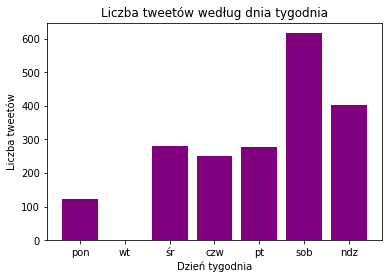

In [41]:
dni_tygodnia = ["pon", "wt", "śr", "czw", "pt", "sob", "ndz"]
liczba = [liczba_pon, liczba_wt, liczba_śr, liczba_czw, liczba_pt, liczba_sob, liczba_ndz]

plt.bar(dni_tygodnia, liczba, color='purple')

plt.xlabel("Dzień tygodnia")
plt.ylabel("Liczba tweetów")
plt.title("Liczba tweetów według dnia tygodnia")
plt.show()